In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch


In [4]:
# get cricketers.csv and put it in a df

df = pd.read_csv('../Datasets/diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

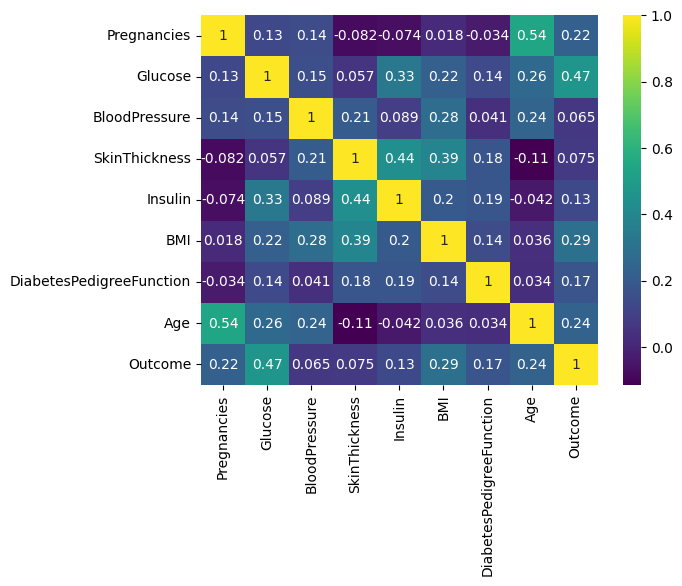

In [7]:
sns.color_palette("flare", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='viridis', )

In [8]:
df2 = df.drop(['Pregnancies','BloodPressure', 'Insulin', 'DiabetesPedigreeFunction','Age','Outcome','Glucose'], axis=1)
df2

,SkinThickness,BMI
0,35,33.6
1,29,26.6
2,0,23.3
3,23,28.1
4,35,43.1
...,...,...
763,48,32.9
764,27,36.8
765,23,26.2
766,0,30.1


In [9]:
df2.describe()

,SkinThickness,BMI
count,768.000000,768.000000
mean,20.536458,31.992578
std,15.952218,7.884160
min,0.000000,0.000000
25%,0.000000,27.300000
50%,23.000000,32.000000
75%,32.000000,36.600000
max,99.000000,67.100000


In [10]:
# Rows that has SkinThickness 0 and BMI 0 are dropped

df2 = df2[(df2.SkinThickness != 0) & (df2.BMI != 0)]

In [11]:
# remove outlyers

df2 = df2[(df2.BMI < 50) & (df2.SkinThickness < 50)]

In [12]:
df2.describe()

,SkinThickness,BMI
count,522.000000,522.000000
mean,28.419540,32.440805
std,9.441518,6.269345
min,7.000000,18.200000
25%,21.000000,27.800000
50%,29.000000,32.500000
75%,35.000000,36.575000
max,49.000000,49.600000


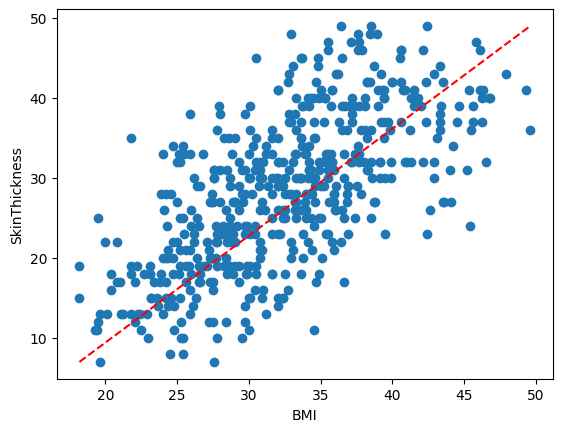

In [13]:
# plot the data
lsp = np.linspace(df2['BMI'].min(), df2['BMI'].max(),722)
lsp2 = np.linspace(df2['SkinThickness'].min(), df2['SkinThickness'].max(),722)
plt.plot(lsp, lsp2, color='red', linestyle='dashed')


plt.scatter(df2['BMI'], df2['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.show()

In [14]:
lsp.shape

(722,)

In [15]:
w1 = torch.normal(mean=0., std=0.1, size=(1, 100), requires_grad=True) 
b1 = torch.normal(mean=0., std=0.1, size=(1, 100), requires_grad=True) 
w2 = torch.normal(mean=0., std=0.1, size=(100, 1), requires_grad=True)
b2 = torch.normal(mean=0., std=0.1, size=(1, 1), requires_grad=True)

In [16]:
# Then define the function
def f(x, weight1=w1, bias1=b1, weight2=w2, bias2=b2): 
    step1  = torch.matmul(x, weight1) # matrix multiplication
    step2 = torch.add(step1, bias1) # addition
    step3 = torch.nn.functional.relu(step2) # ReLU # rectified linear unit
    step4 = torch.matmul(step3, weight2)
    out = torch.add(step4, bias2)
    return out


# Just to be sure everything runs, we make an inference on an example input of 6 random values
sample_input = torch.ones(size=(6, 1)) # create a tensor of size 6x1 with all values equal to 1
f(sample_input).shape # make an inference on the input and check the shape of the output

torch.Size([6, 1])

In [17]:
x = np.array(df2['BMI'])
y = np.array(df2['SkinThickness'])
x, y

(array([33.6, 26.6, 28.1, 43.1, 31. , 30.5, 30.1, 25.8, 45.8, 43.3, 34.6,
        39.3, 29. , 36.6, 31.1, 23.2, 22.2, 36. , 31.6, 24.8, 27.6, 24. ,
        32.9, 38.2, 37.1, 34. , 22.7, 45.4, 42. , 28. , 39.1, 19.4, 24.2,
        24.4, 33.7, 34.7, 23. , 37.7, 41.5, 25.4, 29. , 32.5, 19.6, 28.9,
        32.9, 28.6, 35.1, 32. , 24.7, 37.7, 25. , 22.4, 29.3, 24.6, 32.4,
        38.5, 37.1, 26.5, 32. , 46.7, 24.7, 33.9, 31.6, 20.4, 28.7, 26.6,
        28.7, 29.5, 34.3, 37.4, 33.3, 34. , 31.2, 30.5, 28.2, 23.2, 34.2,
        33.6, 42.9, 33.3, 34.5, 29.7, 34.5, 38.3, 21.1, 33.8, 30.8, 28.7,
        36.9, 39.5, 32.5, 32.8, 32.8, 30.5, 27.3, 34.3, 40.6, 24.6, 25.2,
        29. , 40.9, 29.7, 37.2, 44.2, 29.7, 29.9, 32.5, 28.4, 35.4, 28.9,
        43.5, 29.7, 32.7, 34.9, 27.7, 35.9, 30.1, 32. , 27.9, 31.6, 33.1,
        24.4, 39.4, 22.9, 34.8, 30.9, 31. , 27.3, 20.4, 37.7, 23.9, 37.5,
        33.2, 35.5, 27.7, 34.2, 42.6, 34.2, 41.8, 35.8, 30. , 29. , 34.6,
        28.8, 23.6, 34.6, 37.2, 36.7, 

In [18]:
torch_xs = torch.from_numpy(x).float()[:, None] 
torch_ys = torch.from_numpy(y).float()[:, None]
f(torch_xs).shape # make an inference on the input and check the shape of the output

torch.Size([522, 1])

In [19]:
n_iter = 2000 # the number of iterations
opt = torch.optim.Adam([w1, b1, w2, b2], lr=0.01) # the optimizer with the parameters to optimize and the learning rate

In [20]:
for i in range(n_iter):

    loss_fn = torch.nn.MSELoss() # mean squared error loss
    loss = loss_fn(f(torch_xs), torch_ys) # compute the loss
    loss.backward() # compute the gradients
    opt.step() # update the parameters
    if i % 10 == 0: # print the loss every 10 iterations
        print(i, loss.item()) 
        
    opt.zero_grad() # zero the gradients

0 901.467529296875
10 52.653663635253906
20 78.46910095214844
30 67.75359344482422
40 51.342864990234375
50 51.659183502197266
60 51.83266830444336
70 51.29111099243164
80 51.0448112487793
90 50.98912811279297
100 50.9792366027832
110 50.9732780456543
120 50.96651077270508
130 50.9593620300293
140 50.952056884765625
150 50.94462966918945
160 50.93705368041992
170 50.92932891845703
180 50.92144775390625
190 50.913414001464844
200 50.90524673461914
210 50.89696502685547
220 50.88856506347656
230 50.880062103271484
240 50.87146759033203
250 50.862789154052734
260 50.854034423828125
270 50.84521484375
280 50.83633804321289
290 50.82741165161133
300 50.818443298339844
310 50.80944061279297
320 50.800411224365234
330 50.791358947753906
340 50.78230667114258
350 50.773231506347656
360 50.76416778564453
370 50.755104064941406
380 50.74604797363281
390 50.73701858520508
400 50.72800827026367
410 50.719024658203125
420 50.710079193115234
430 50.701171875
440 50.69231033325195
450 50.683490753173

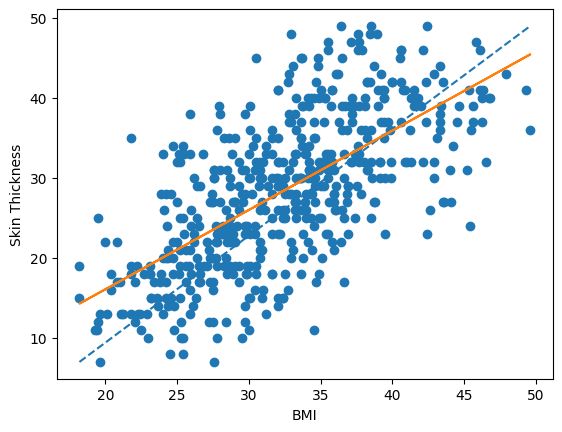

In [21]:
torch_lsp = torch.from_numpy(x).float()[:, None] # convert the numpy array to a tensor of shape (80,1)
predicted_ys = f(torch_lsp).detach().numpy() # make an inference on the input and check the shape of the output

plt.plot(lsp, lsp2, linestyle='dashed') # Plot the hidden function
plt.plot(x, predicted_ys) # Plot the learned function

# Plot the samples
plt.scatter(df2['BMI'], df2['SkinThickness']) 
plt.xlabel('BMI')
plt.ylabel('Skin Thickness')
plt.show()